In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('Human_PVP_no_norm.csv')

data.drop(['Chr', 'Position', 'RSID', 'Ref', 'Alt', 'Gene', 'OMIM'], axis=1, inplace=True)

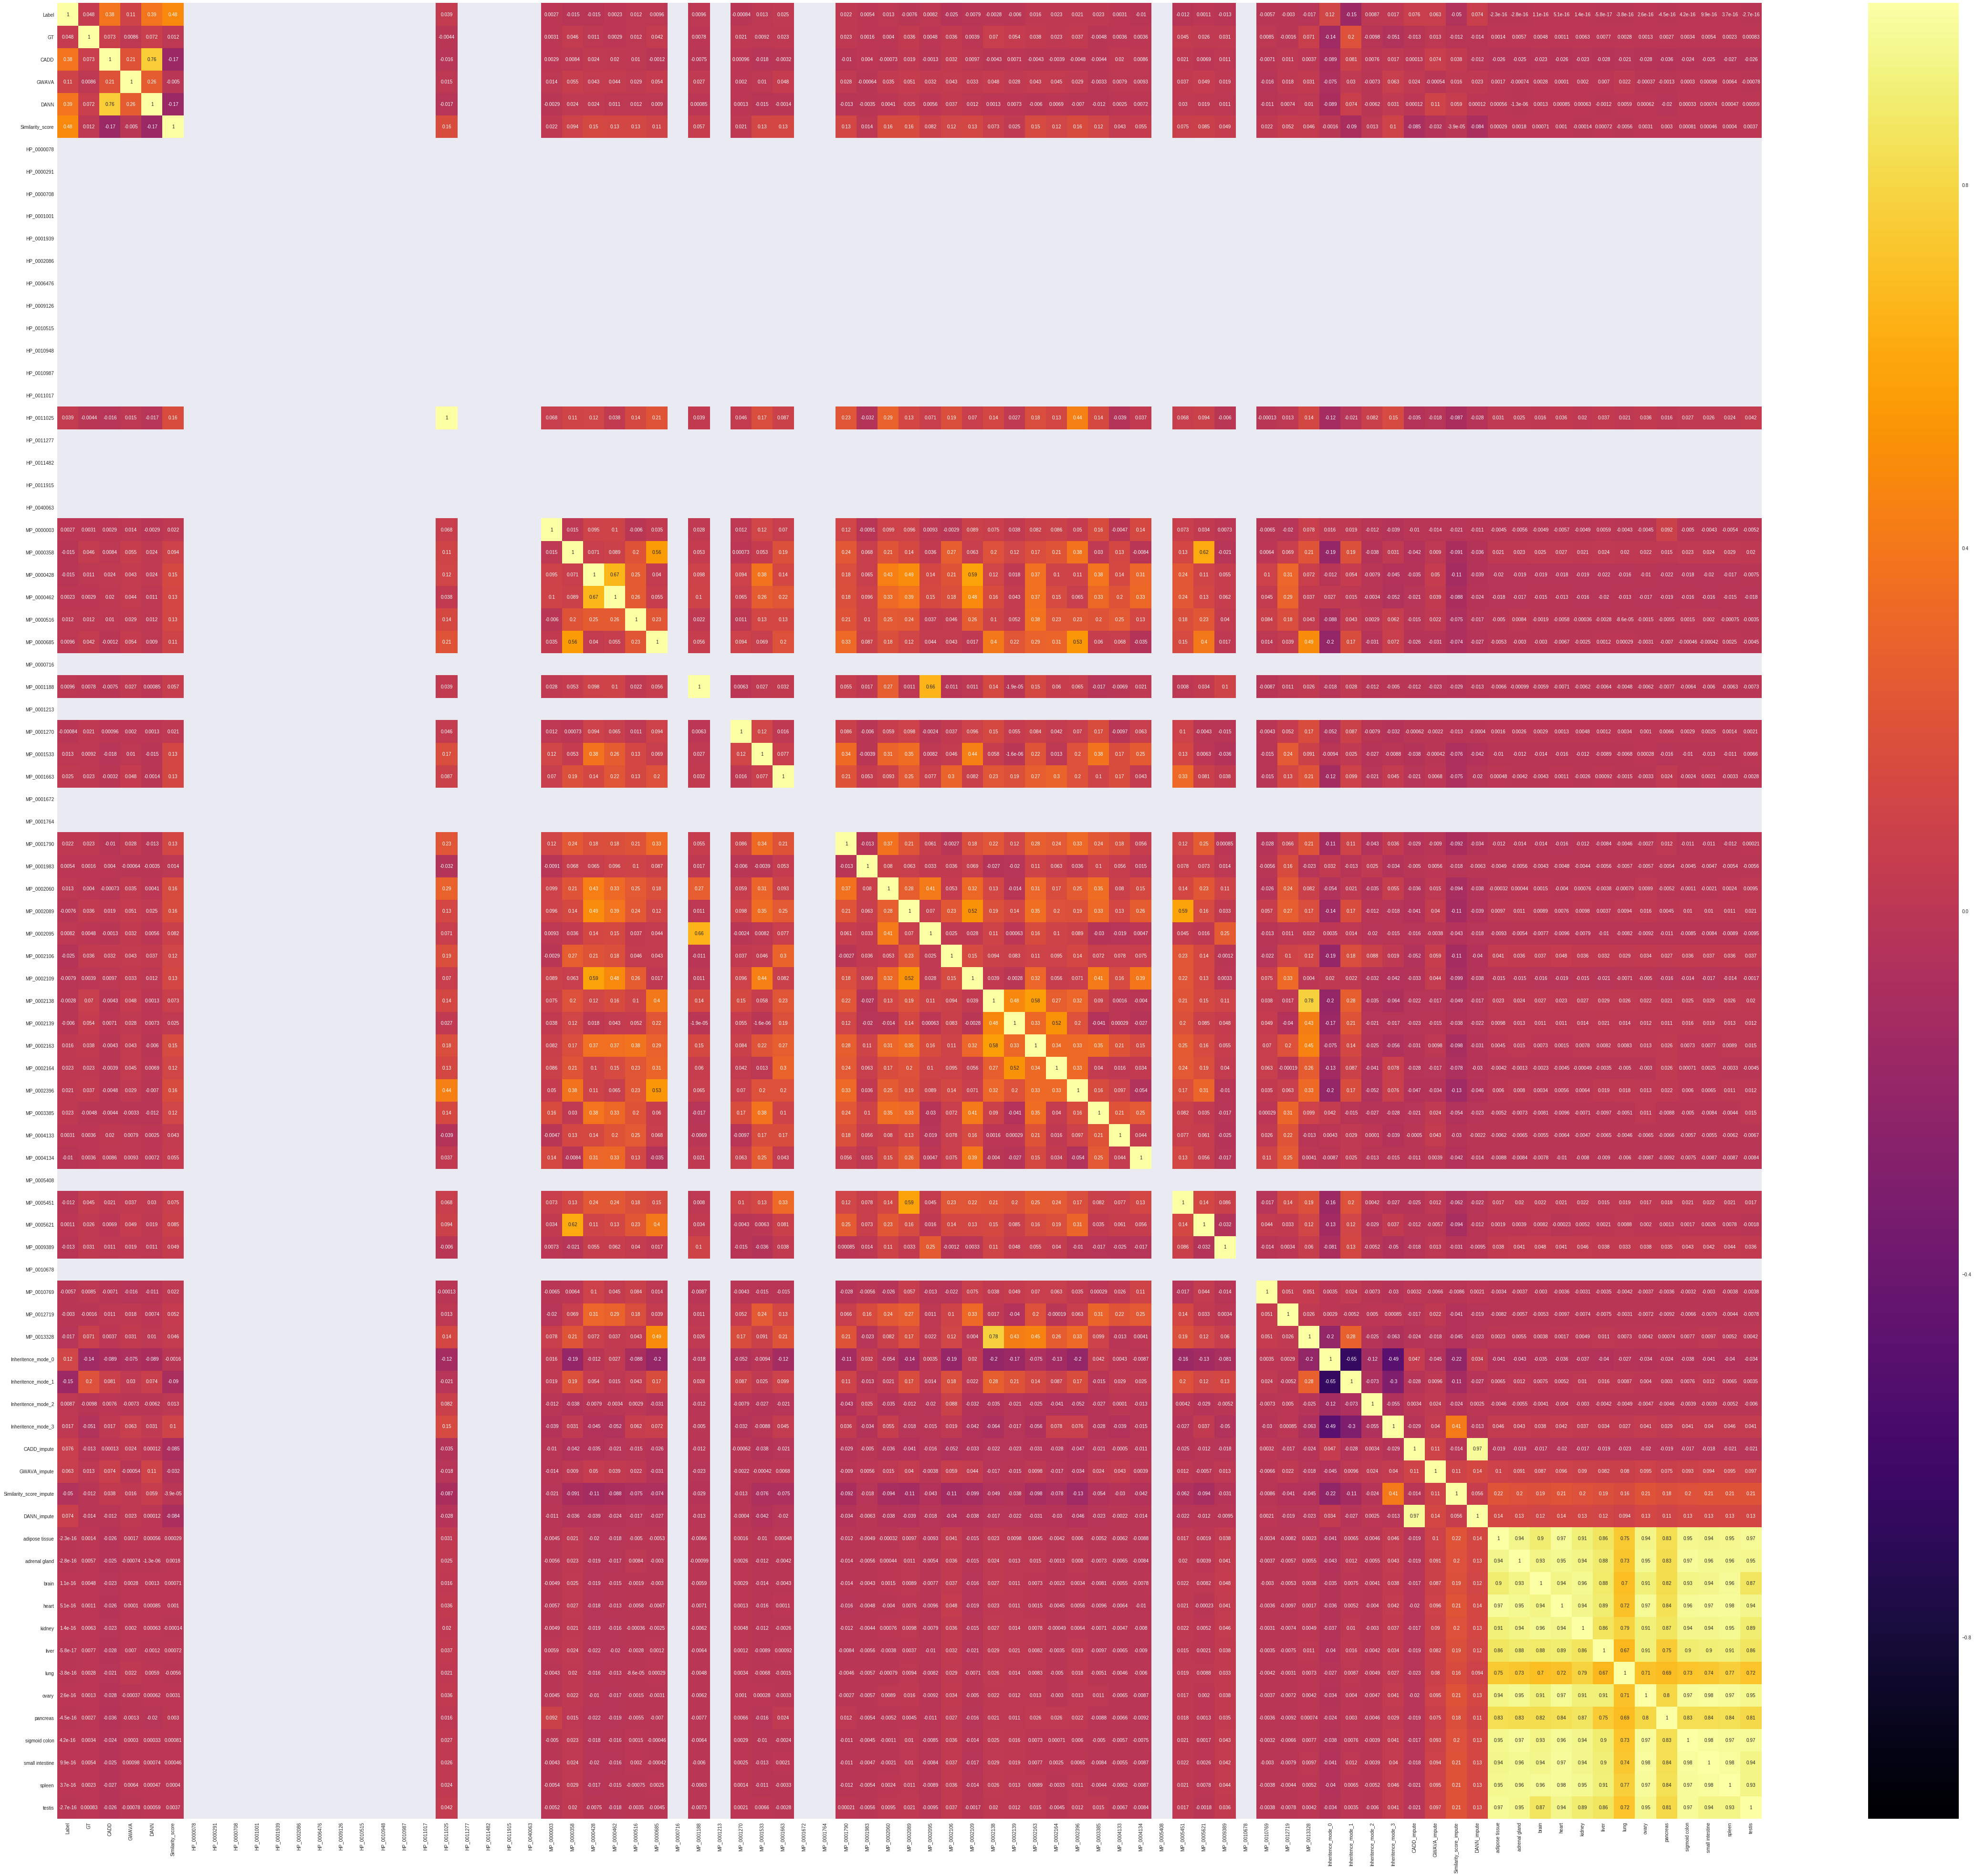

In [83]:
corr = data.corr(method='pearson')

f, ax = plt.subplots(figsize=(80, 70))


sns.heatmap(corr, cmap='inferno', annot =True)


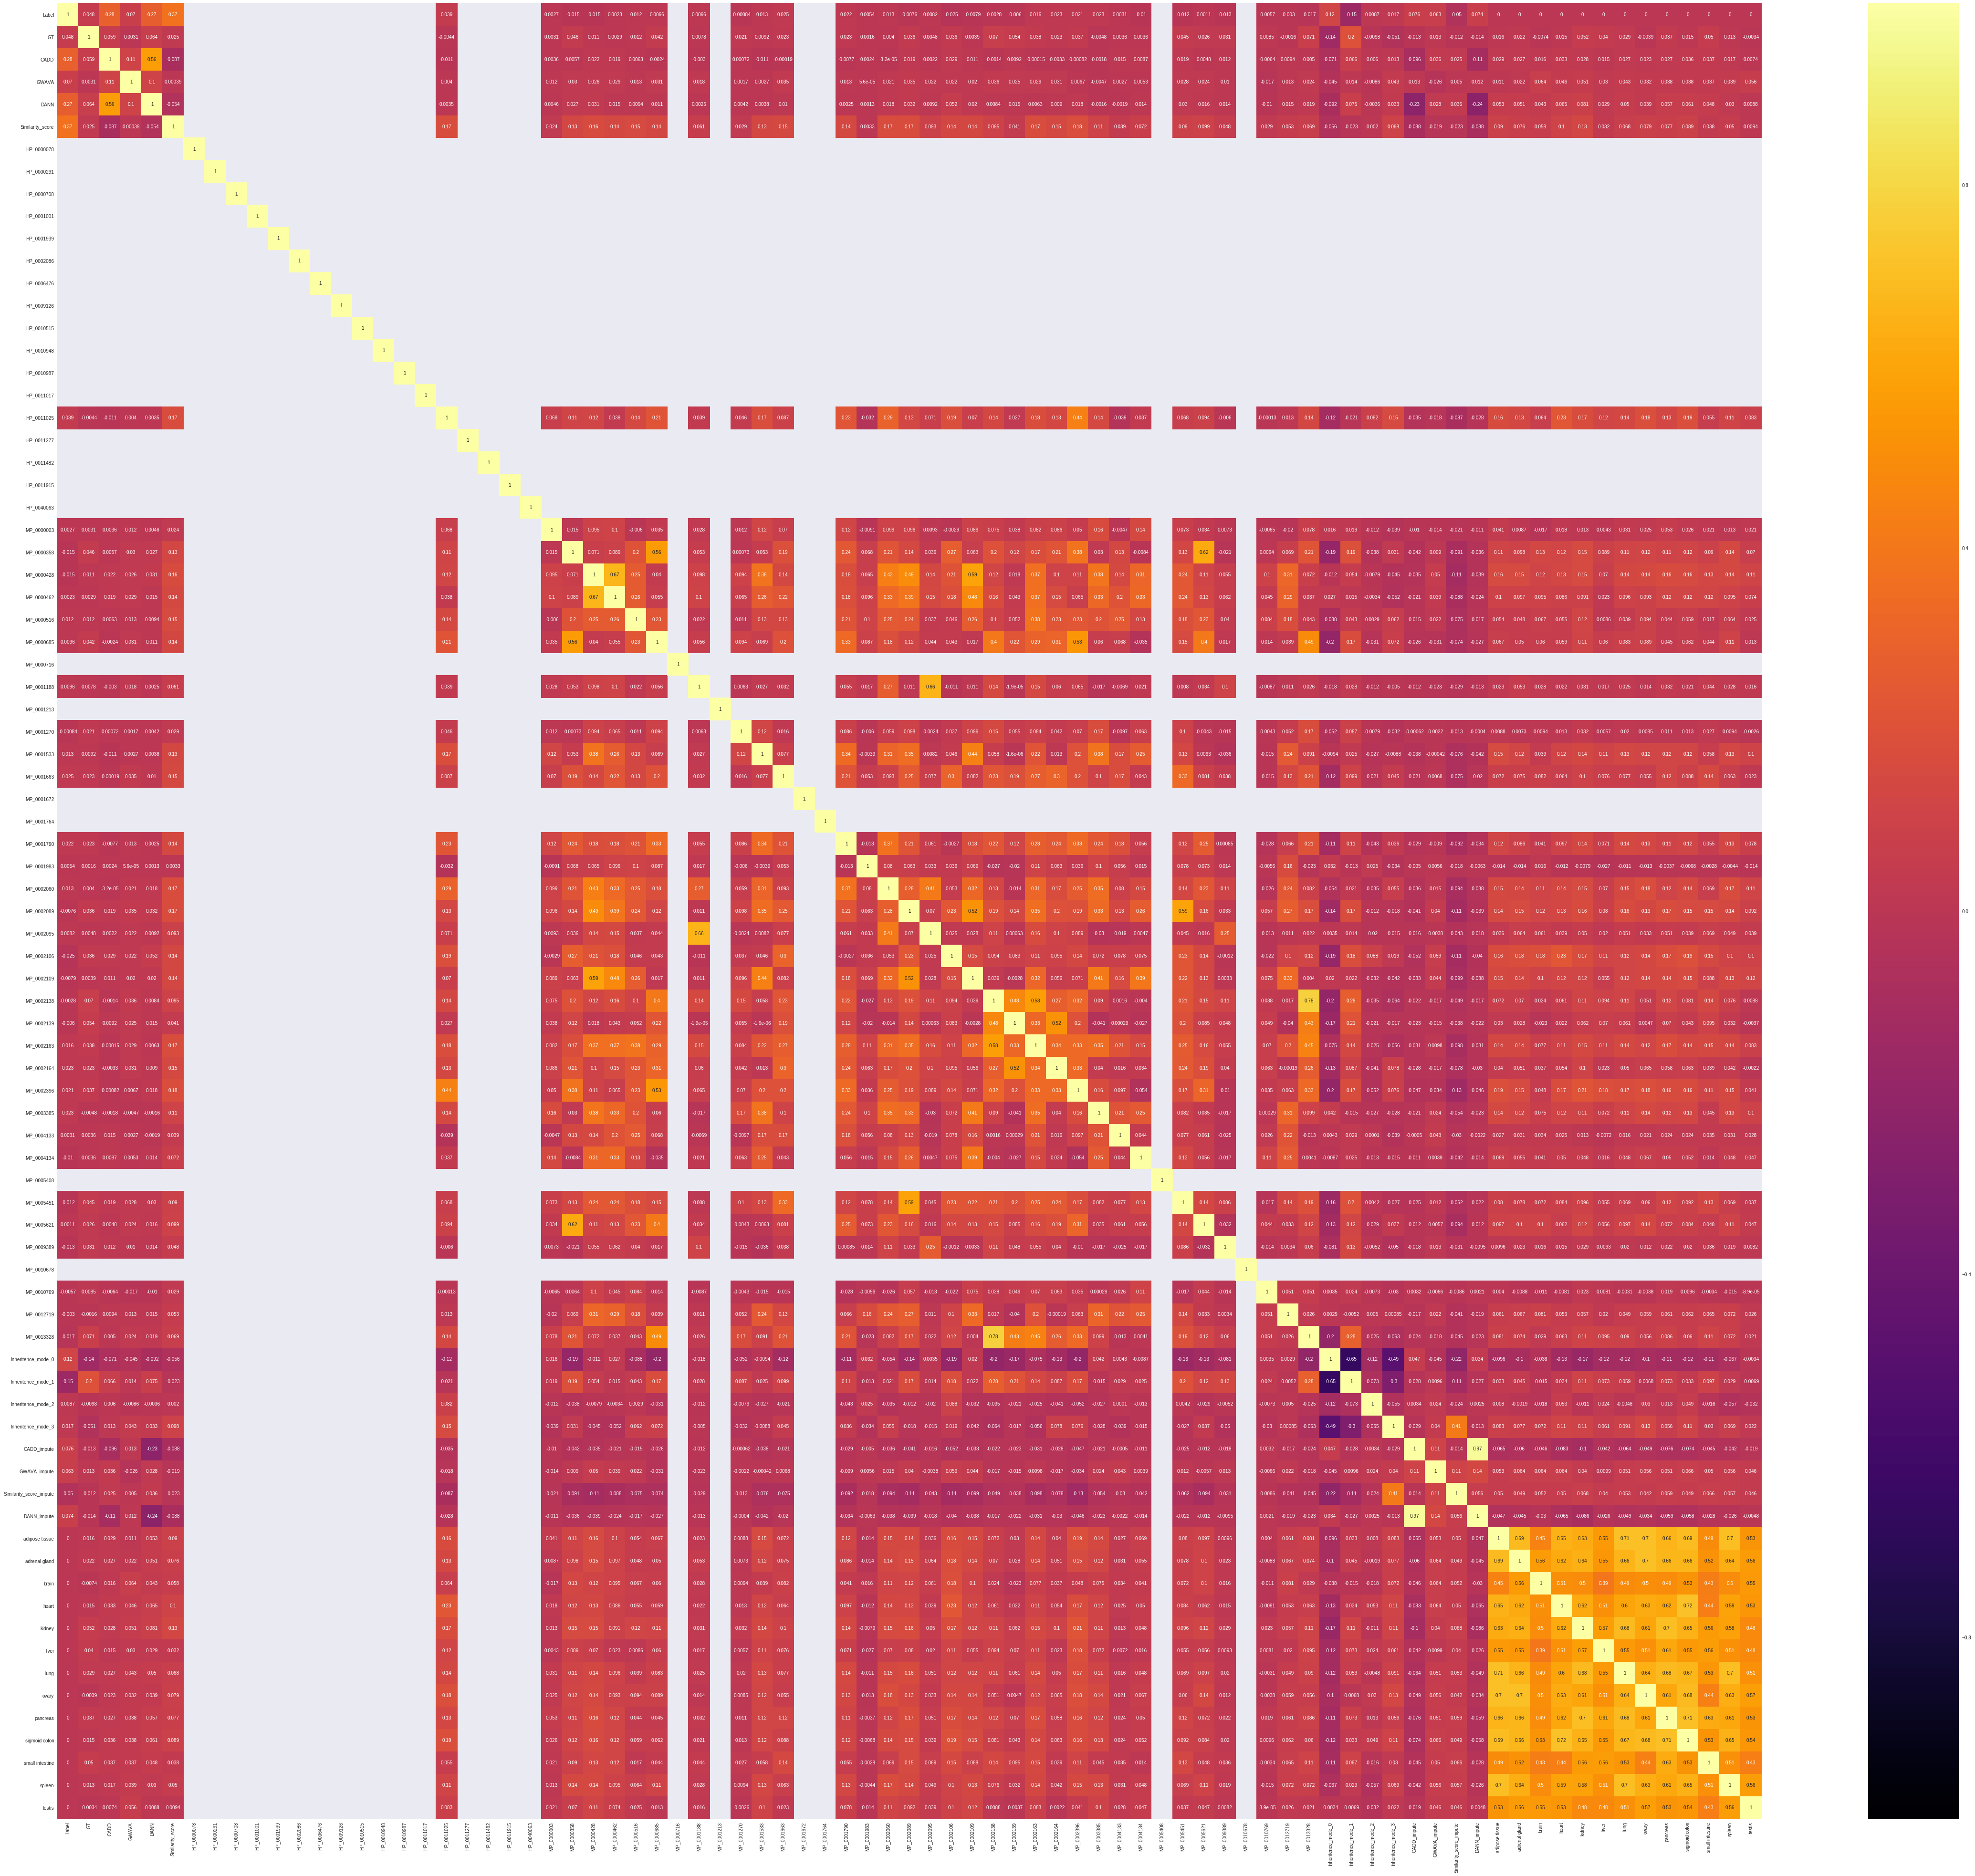

In [89]:
corr = data.corr(method='kendall')

f, ax = plt.subplots(figsize=(80, 70))


sns.heatmap(corr, cmap='inferno', annot =True)


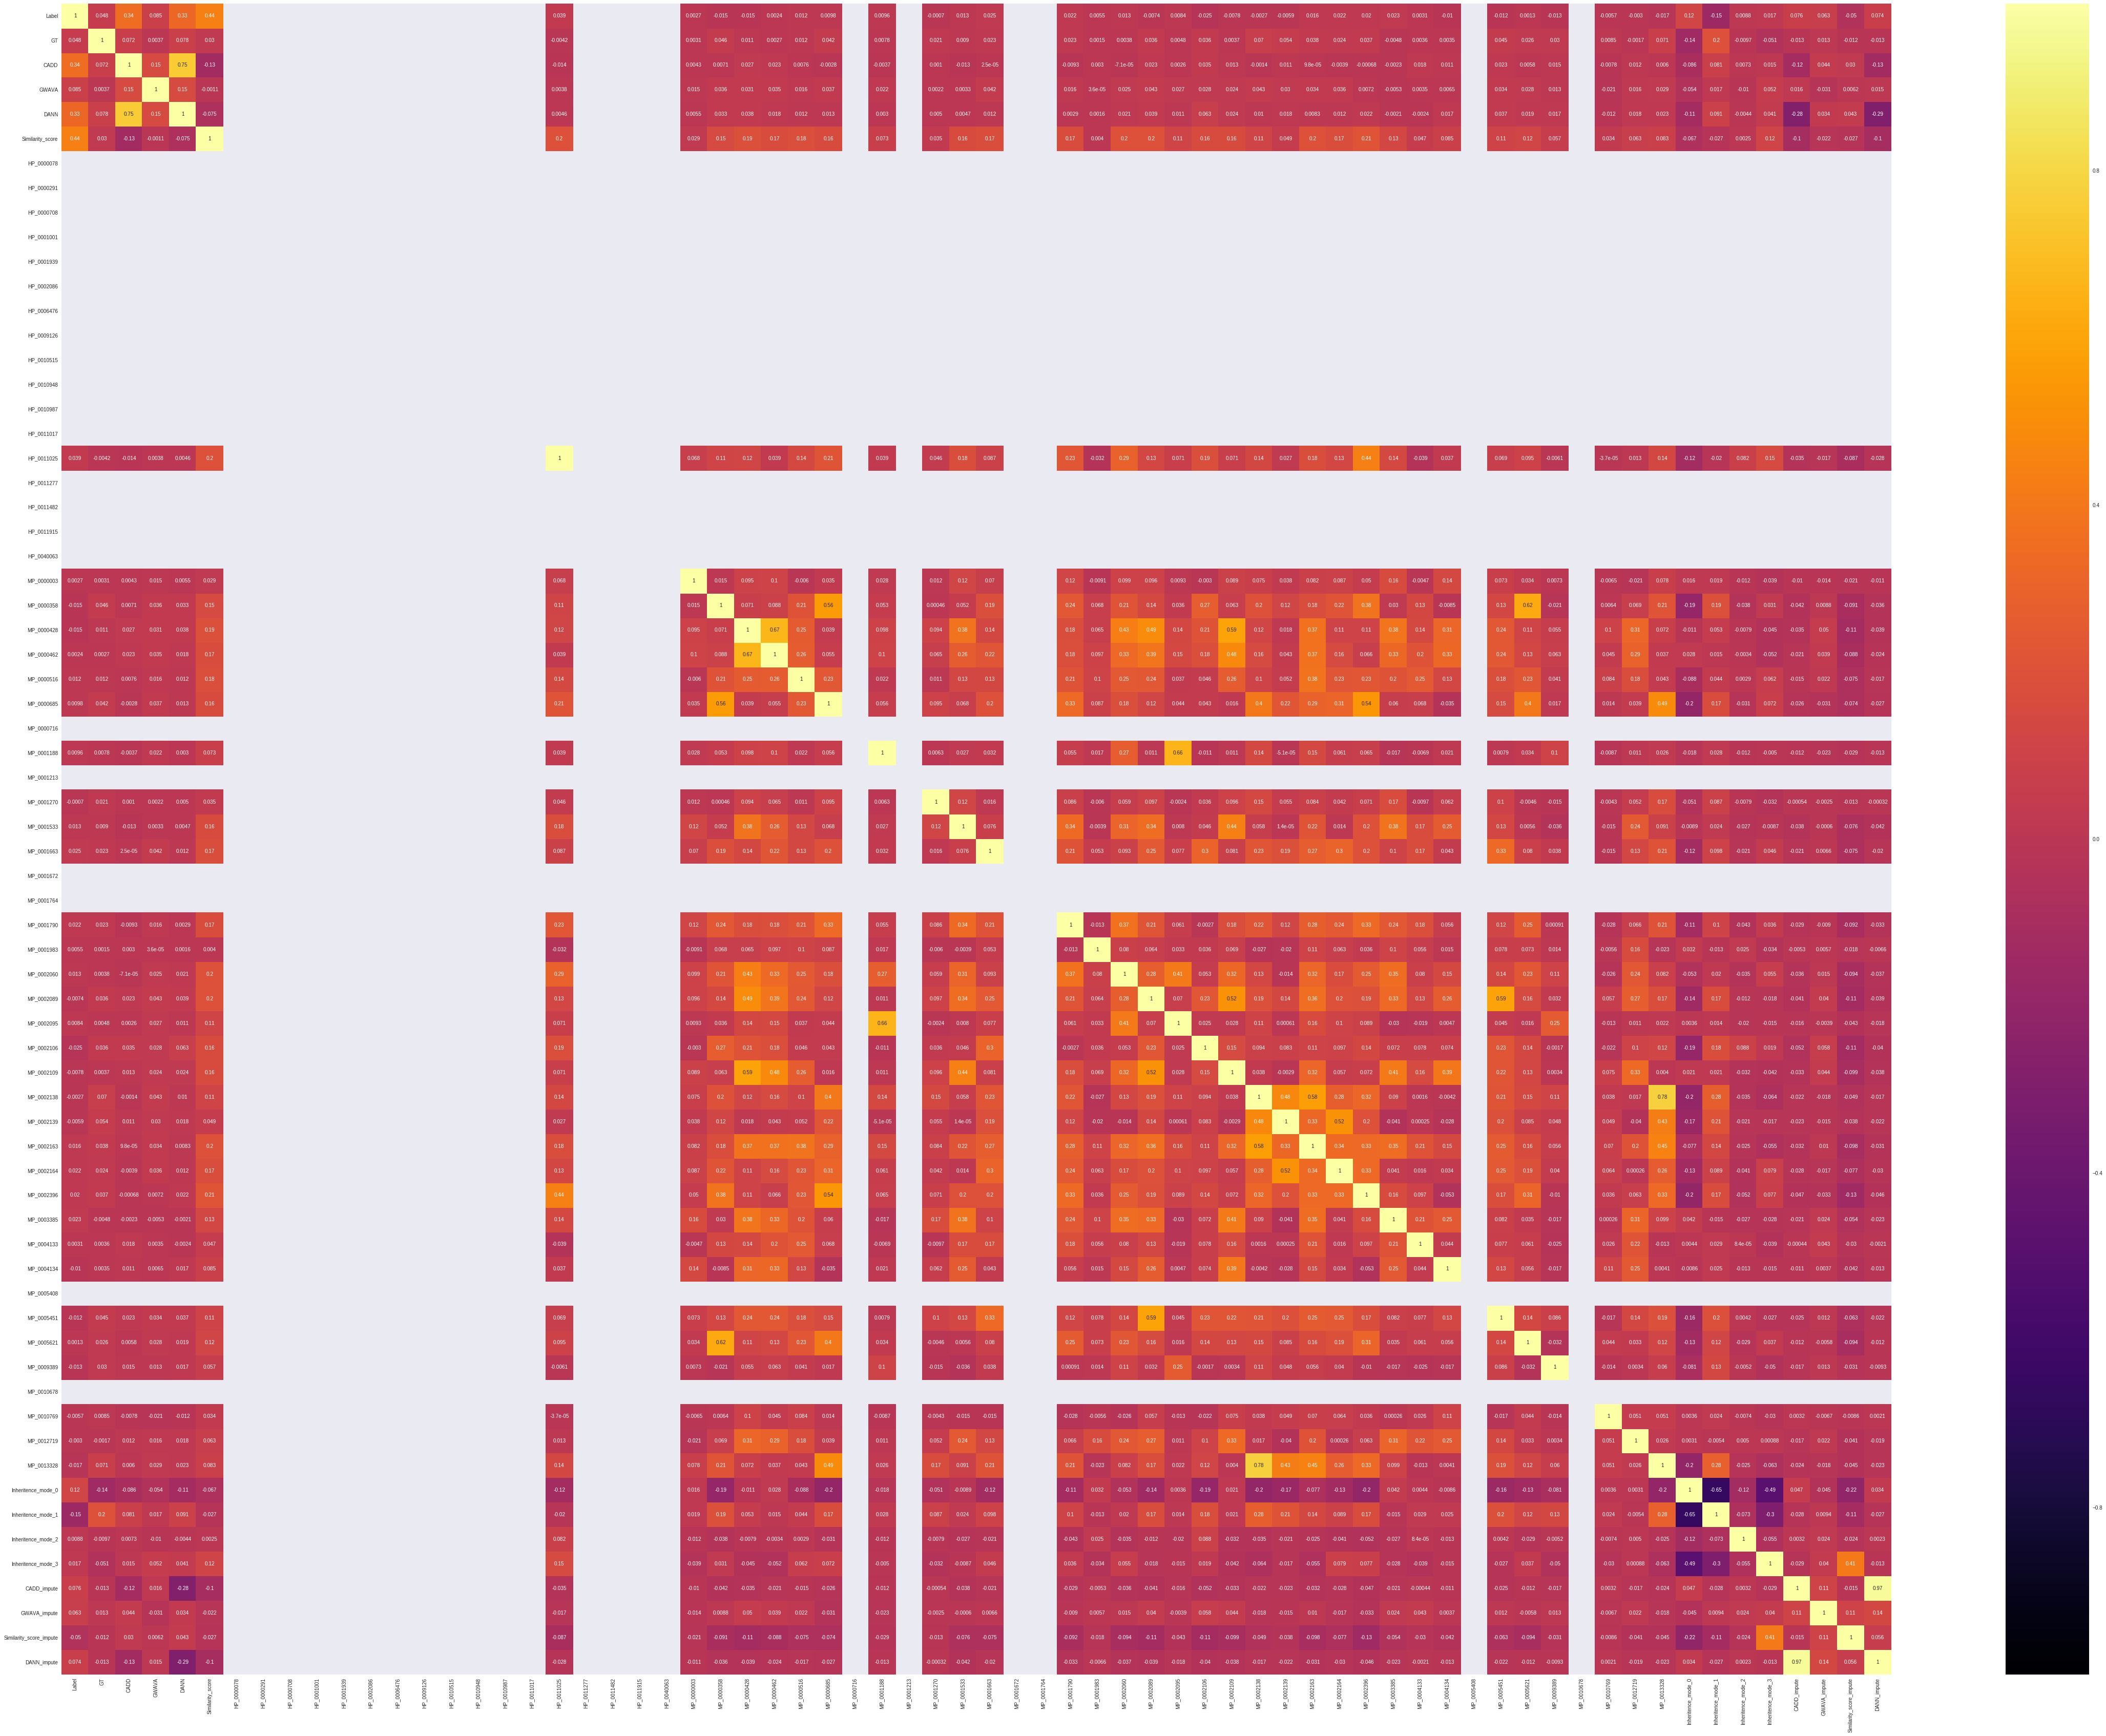

In [5]:
corr = data.corr(method='spearman')

f, ax = plt.subplots(figsize=(80, 70))


sns.heatmap(corr, cmap='inferno', annot =True)


In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

array = data.values

X = array[:, 1:81]
Y = array[:, 0]


#feature extraction
test = SelectKBest(score_func=chi2, k='all')
fit =test.fit(X, Y)

test1 = SelectKBest(score_func=f_classif, k='all')
fit1 =test1.fit(X, Y)

#score
np.set_printoptions(precision=4)

S = fit.scores_

S_anova = fit1.scores_

C = data.columns
C1 = C[1:81]


dict1 = {}
dict2 = {}


for i in range(len(S)):
    dict1[C1[i]] = S[i]
    
for i in range(len(S_anova)):
    dict2[C1[i]] = S_anova[i]
    
    
from math import isnan
clean1 = {k: dict1[k] for k in dict1 if not isnan(dict1[k])}

clean2 = {k: dict2[k] for k in dict2 if not isnan(dict2[k])}


import operator
sort1 = sorted(clean1.items(), key = operator.itemgetter(1))

sort2 = sorted(clean2.items(), key = operator.itemgetter(1))


In [88]:
sort1

[('testis', 7.1169651546778528e-26),
 ('ovary', 4.436161132103043e-25),
 ('adipose tissue', 8.9345357546135281e-25),
 ('lung', 9.2826145921489326e-25),
 ('spleen', 1.4160484919303217e-24),
 ('liver', 1.5099954210096568e-24),
 ('heart', 2.9766823355191982e-24),
 ('small intestine', 3.0874473425812175e-24),
 ('adrenal gland', 3.922153856189756e-24),
 ('kidney', 3.9516350200578174e-24),
 ('brain', 4.1161950822198141e-24),
 ('pancreas', 5.0544323259506514e-24),
 ('sigmoid colon', 6.9229308560963344e-24),
 ('MP_0001270', 0.07407407407407407),
 ('MP_0005621', 0.099943321367844326),
 ('MP_0000462', 0.47555905157882911),
 ('MP_0002138', 0.73413897280966767),
 ('MP_0000003', 0.75834084761045983),
 ('MP_0012719', 0.92493164305244846),
 ('MP_0004133', 0.96566523605150212),
 ('MP_0001983', 3.0339805825242721),
 ('MP_0010769', 3.4218009478672986),
 ('MP_0002139', 3.5756327251324307),
 ('MP_0002089', 4.3054729619343242),
 ('MP_0002109', 5.2521228589451212),
 ('MP_0002095', 6.9097291875626885),
 ('In

## Model t-sne

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 3, random_state = 0)
x_3d = tsne.fit_transform(X)

MemoryError: 